## Dragon Real Estate -Price Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing=pd.read_csv("housing.csv")

In [3]:
housing.shape

(506, 14)

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RN       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing["CHAS"]

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [7]:
housing["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288317,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705053,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RN'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

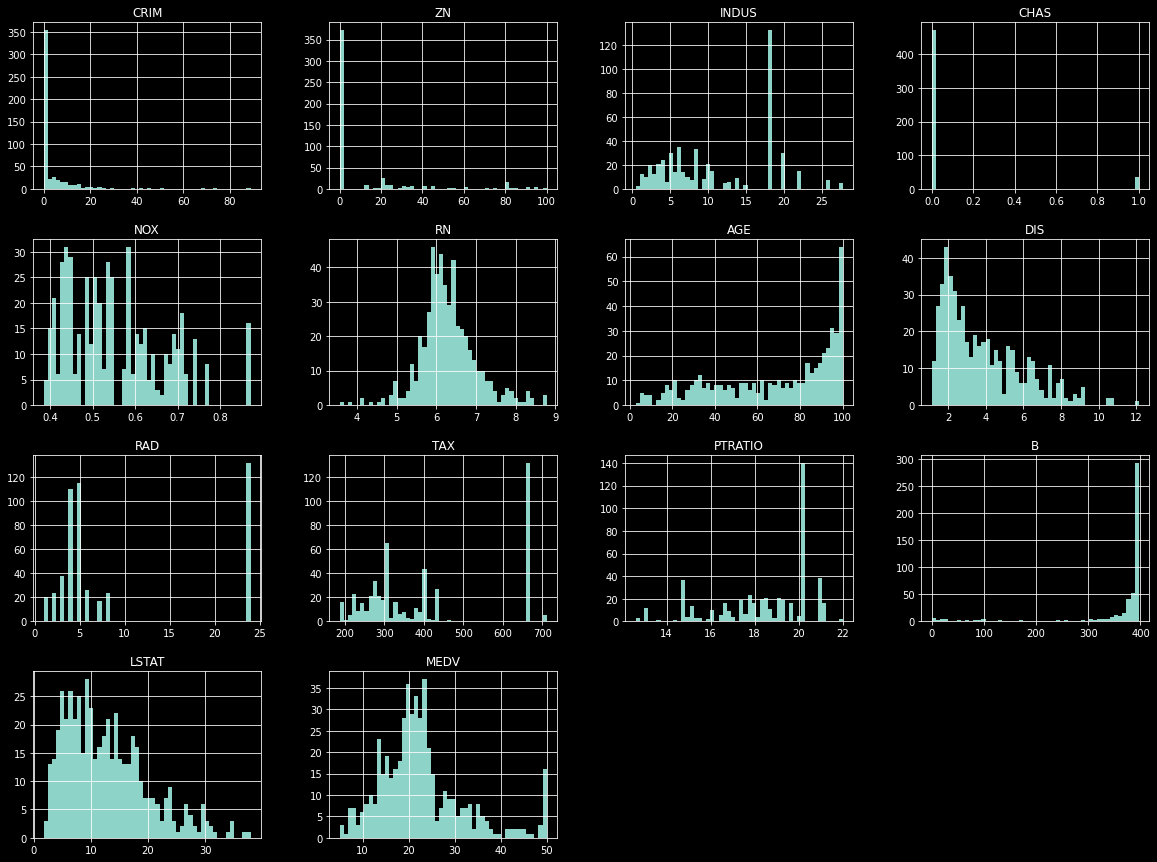

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
style.use("dark_background")
housing.hist(bins=50,figsize=(20,15))

## Train_Test_Spliting

In [10]:
def train_test_split(data,test_ratio):
    np.random.seed(42)
    suffle=np.random.permutation(len(data))
    print(suffle)
    test_set_size=int(len(data)*test_ratio)
    test_indices=suffle[:test_set_size]
    train_indices=suffle[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
train_set,test_set=train_test_split(housing,0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [12]:
print("train_set is" ,len(train_set), "test_set is",len(test_set))

train_set is 405 test_set is 101


## or

In [13]:
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

In [14]:
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=55)

In [15]:
print("train_sett",len(train_set),"test_set",len(test_set))

train_sett 404 test_set 102


In [16]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["CHAS"]):
    strat_train=housing.loc[train_index]
    strat_test=housing.loc[test_index]

In [17]:
strat_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.284474,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716154,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.219000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.633000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [18]:
strat_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
strat_test["CHAS"].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [20]:
strat_train["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [21]:
housing=strat_train.copy()

## Looking For Correlation

In [22]:
corr_matrix=housing.corr()

In [23]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RN         0.679515
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RN'>,
        <AxesSubplot:xlabel='RN', ylabel='RN'>,
        <AxesSubplot:xlabel='ZN', ylabel='RN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RN', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

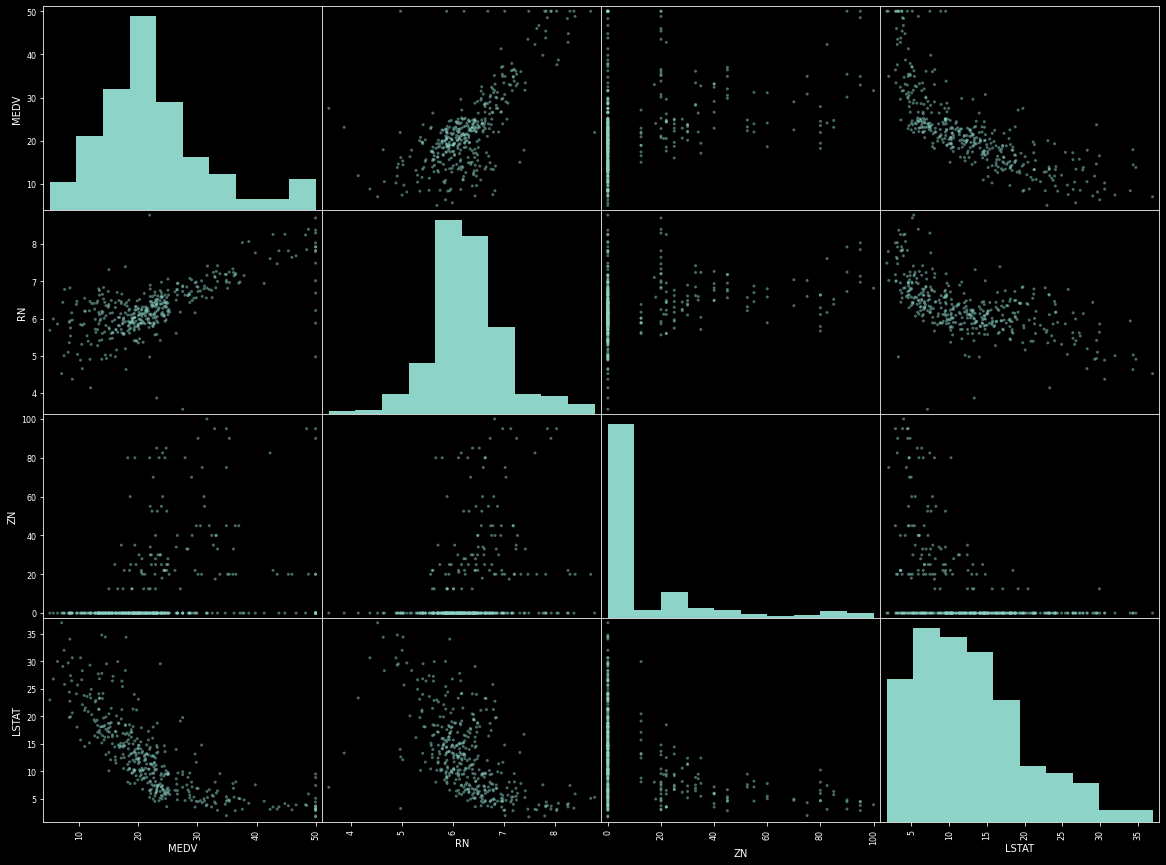

In [24]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RN","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(20,15))

<AxesSubplot:xlabel='RN', ylabel='MEDV'>

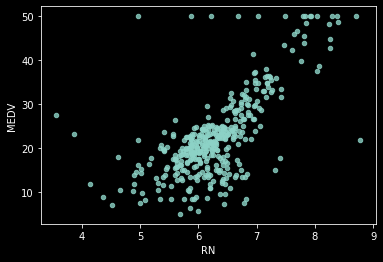

In [25]:
housing.plot(kind="scatter",x="RN",y="MEDV",alpha=0.8)

## Trying Out Attribute Combination

In [26]:
housing["TAXRN"]=housing["TAX"]/housing["RN"]

In [27]:
housing["TAXRN"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRN, Length: 404, dtype: float64

In [28]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRN
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [29]:
correlation_matrix1=housing.corr()

In [30]:
correlation_matrix1["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RN         0.679515
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRN     -0.531038
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRN', ylabel='MEDV'>

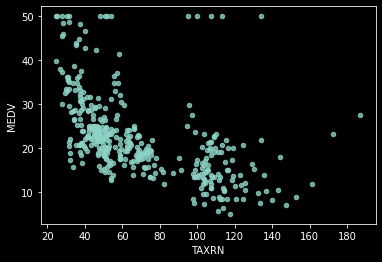

In [31]:
housing.plot(kind="scatter",x="TAXRN",y="MEDV",alpha=0.8)

In [32]:
housing_label=strat_train["MEDV"].copy()
housing_label=housing_label.astype(int)


In [33]:
housing=strat_train.drop("MEDV",axis=1)


## missing attributes

In [34]:
housing.shape

(404, 13)

In [35]:
housing.dropna(subset=["RN"]).shape #option 1

(399, 13)

In [36]:
housing.drop("RN",axis=1).shape #option 2

(404, 12)

In [37]:
median=housing["RN"].median() #option 3

In [38]:
housing["RN"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RN, Length: 404, dtype: float64

In [39]:
housing.describe()#before filling missing value

,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.284474,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716154,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.219000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.633000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [40]:
from sklearn.impute import SimpleImputer

In [41]:
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [42]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [43]:
x=imputer.transform(housing)

In [44]:
housing_tr=pd.DataFrame(x,columns=housing.columns)

In [45]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283663,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711735,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.219000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## creating pipeline

In [46]:
from sklearn.pipeline import Pipeline

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
my_pipeline=Pipeline([
   ("imputer",SimpleImputer(strategy='median')),
     ("std_scaler" ,StandardScaler())
])

In [49]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [50]:
housing_num_tr.shape

(404, 13)

## selecting a desired model for dragon real estate

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [52]:
model=LogisticRegression()
model1= DecisionTreeRegressor()
model2=RandomForestRegressor()

In [53]:
model.fit(housing_num_tr,housing_label)

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
model1.fit(housing_num_tr,housing_label)

DecisionTreeRegressor()

In [55]:
some_data=housing.iloc[:5]
some_labels=housing_label.iloc[:5]

In [56]:
prepared_data=my_pipeline.transform(some_data)

In [57]:
model.predict(prepared_data)

array([24, 24, 13, 22, 24])

In [58]:
model1.predict(prepared_data)

array([21., 24., 16., 23., 23.])

In [59]:
list(some_labels[:5])

[21, 24, 16, 23, 23]

In [60]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24711623, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Regression

## evaluating the model(Linear)

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
prediction=model.predict(housing_num_tr)

In [63]:
lin_mse=mean_squared_error(housing_label,prediction)

In [64]:
lin_rmse=np.sqrt(lin_mse)

In [65]:
lin_rmse

5.078590277618464

In [66]:
lin_mse

25.792079207920793

## (DecisionTree) evaluating model

In [67]:
prediction1=model1.predict(housing_num_tr)
mse=mean_squared_error(housing_label,prediction1)
rmse=np.sqrt(mse)

In [68]:
mse

0.0

In [69]:
rmse

0.0

## using better evaluation technique-cross validation

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
scores=cross_val_score(model1,housing_num_tr,housing_label,scoring="neg_mean_squared_error",cv=10)
rsme_score=np.sqrt(-scores)

In [72]:
rsme_score

array([4.15844718, 5.43700061, 5.15136733, 3.5095688 , 4.13823634,
       3.84382622, 5.83095189, 3.5951356 , 3.5531676 , 3.57770876])

In [73]:
scores1=cross_val_score(model,housing_num_tr,housing_label,cv=10,scoring="neg_mean_squared_error")
rsme_score1=np.sqrt(-scores1)

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of it

In [74]:
rsme_score1

array([4.02128483, 5.16791225, 5.00487567, 5.98371774, 3.78153408,
       5.40601517, 7.01427117, 8.89381808, 5.94768863, 6.76017751])

In [75]:
rsme_score.mean()

4.2795410336440245

In [76]:
rsme_score.std()

0.8253849094053712

In [77]:
rsme_score1.mean()

5.798129513613468

In [78]:
rsme_score1.std()

1.4299877185038232

## RandomForestRegressor model

In [79]:
model2.fit(housing_num_tr,housing_label)

RandomForestRegressor()

In [80]:
model2.predict(prepared_data)

array([21.86, 24.98, 16.18, 23.09, 23.3 ])

In [81]:
predict=model2.predict(housing_num_tr)

In [82]:
mse2=mean_squared_error(housing_label,predict)

In [83]:
rmse2=np.sqrt(mse2)

In [84]:
rmse2

1.1857842999216148

In [85]:
mse2

1.4060844059405944

In [86]:
scores2=cross_val_score(model2,housing_num_tr,housing_label,scoring="neg_mean_squared_error",cv=10)

In [87]:
rmse_score2=np.sqrt(-scores2)

In [88]:
rmse_score2

array([2.88441988, 2.75259124, 4.41222747, 2.72449011, 3.39685148,
       2.60078354, 4.90103484, 3.38933806, 3.33154994, 3.18073144])

In [89]:
rmse_score2.mean()

3.357401799644806

In [90]:
rmse_score2.std()

0.7136156671318027

## saving

In [91]:
from joblib import dump,load
dump(model2,"Dragon_Real_Estate.joblib")

['Dragon_Real_Estate.joblib']

## testing the model on test data

In [92]:
x_test=strat_test.drop("MEDV",axis=1)
y_test=strat_test["MEDV"].copy().astype(int)
x_test_prepared=my_pipeline.transform(x_test)
final_prediction=model2.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_prediction)
final_rmse=np.sqrt(final_mse)
#print(final_prediction,list(y_test))

In [93]:
final_mse

8.891382352941175

In [94]:
final_rmse

2.981842107312387

## using the model

In [95]:
from joblib import dump,load
import numpy as np
model2=load("dragon_real_estate.joblib")
features=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24711623, -1.31238772,  5.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model2.predict(features)

array([21.74])